# poverty vs opioids


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import requests
import time
from datetime import datetime
#from api_keys import api_key

In [36]:
#get census and opioid data
census_df = pd.read_csv('data/censusData20181217.csv')
opioid_df = pd.read_csv('data/districtdata.csv')

In [46]:
#STATEFP	DISTRICT, state	cDistrict, get just date rates and merge
# drugdeathrate: Drug-related Deaths per 100,000
opioidr_df= opioid_df.rename(columns={'STATEFP': 'state', 'DISTRICT':'cDistrict'})
oDeaths_df= opioidr_df[(opioidr_df['INDICATOR']=='drugdeathrate')& (opioidr_df['YEAR']==2016)]
merged_df=pd.merge(census_df, oDeaths_df, on=['state', 'cDistrict'])
merged_df.head()

,Unnamed: 0_x,population,mAgeTotal,mAgeM,mAgeF,state,cDistrict,schoolTotal,No Schooling,Nursery,...,withW,healthTotal,healthM,healthF,Unnamed: 0_y,YEAR,INDICATOR,VALUE,STATE,STATEABBREVIATION
0,0,704457,39.6,38.3,41.0,1,1,483628,6173,0,...,84952,691182,327312,363870,79833,2016,drugdeathrate,12.7,Alabama,AL
1,1,681621,38.2,36.7,40.1,1,2,464210,5620,0,...,81900,661346,315970,345376,79847,2016,drugdeathrate,0.3,Alabama,AL
2,2,709482,38.3,36.6,39.8,1,3,472077,7650,0,...,79581,696843,335042,361801,79861,2016,drugdeathrate,6.8,Alabama,AL
3,3,683273,40.7,39.7,42.0,1,4,472340,11335,137,...,92560,677025,330956,346069,79875,2016,drugdeathrate,11.7,Alabama,AL
4,4,712529,40.1,38.4,41.8,1,5,490229,6742,76,...,78801,701156,342268,358888,79889,2016,drugdeathrate,11.5,Alabama,AL


In [67]:
incomeBelow= merged_df['psUTotal'] #poverty status, income below poverty level
incomeAbove= merged_df['psOTotal'] #poverty status, income above poverty level
deathrate= merged_df['VALUE'] # deathrate /100kppl
print(incomeBelow.min(), incomeBelow.max(), incomeAbove.min(), incomeAbove.max() )

33780 271780 441381 797006


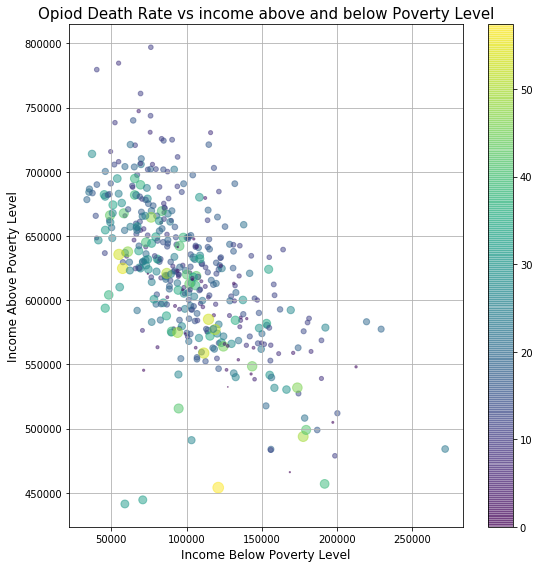

In [95]:
fig, ax = plt.subplots( figsize=(8,8))

sctr =ax.scatter(incomeBelow, incomeAbove, c=deathrate, s=deathrate*2,  alpha=0.5, cmap='viridis')
#plt.colorbar(sctr, ax, format='$%d')
plt.colorbar(sctr)
ax.grid(True)
ax.set_xlabel('Income Below Poverty Level', fontsize=12)
ax.set_ylabel('Income Above Poverty Level', fontsize=12)
ax.set_title('Opiod Death Rate vs income above and below Poverty Level', fontsize=15)


fig.tight_layout()
plt.savefig("data/povertyVSdeathRate.png")
plt.show()


In [64]:
#plt.contour(incomeBelow,incomeAbove,deathrate, 20, cmap='RdGy')
#kwargs=dict(histtype='stepfilled', alpha=0.3, normed=True, bins=20)
#plt.hist(incomeBelow,**kwargs)
#plt.hist(incomeAbove, **kwargs)
#plt.hist(deathrate*7, **kwargs)

In [56]:
deathrate.max()

57.4